# PCA IN PRACTICE WITH A LARGER DATASET

You are now provided with a dataset consisting of 500 users, where each user has four features: Usage time, Interactions, Activity type 1, Activity type 2. You will apply PCA using python to reduce the dimensionality

## TASKS

1. LOADING THE DATASET - Loading the dataset and computing covariance matrix of the data

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
user_activity_data = pd.read_csv('user_activity_data.csv')

# Convert the user activity data to a matrix
user_activity_matrix = user_activity_data.values

# printing the head of the matrix
print(user_activity_matrix[:5])

# Display the shape of the matrix to confirm the conversion
user_activity_matrix.shape


[[129.93428306  32.          17.82754823   8.21301612]
 [117.23471398  28.           6.1961862   14.12331428]
 [132.95377076  32.          18.76670811   3.59297736]
 [150.46059713  22.          16.90579192  19.4132456 ]
 [115.31693251  26.          21.44876377  13.16817043]]


(500, 4)

## Computing the covariance matrix

You calculate the mean of each feature


In [14]:
mean = np.mean(user_activity_matrix, axis=0)
print(mean)
print(mean == user_activity_matrix.mean(axis=0))
# centering data along the mean
centered_data = user_activity_matrix - mean
# building the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print(cov_matrix)

[120.13675989  29.882       15.17218503   9.97142659]
[ True  True  True  True]
[[385.14317418   2.89214677  -3.14729032   1.70302815]
 [  2.89214677  33.42292184  -1.63807388   0.55538659]
 [ -3.14729032  -1.63807388  24.5661308   -1.05278947]
 [  1.70302815   0.55538659  -1.05278947   8.35248038]]


Performing PCA

In [15]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sorting the eigenvalues and eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [385.20247624  33.70345427  24.30801924   8.27075746]
Eigenvectors:
 [[-0.99991691 -0.00981203  0.00741691 -0.00385725]
 [-0.00826886  0.98389093  0.17771336 -0.01755614]
 [ 0.00877718 -0.17625618  0.98235299  0.06196225]
 [-0.00455545  0.0282155  -0.05784073  0.99791662]]


### CALCULATING EXPLAINED VARIANCE

This will help you know how much of total variability in the data is captured by principal components. It helps you know the number of principal components you can retain. Components with higher explained variance are more important

It will quantify how much information (variance), each principal component captures from the original dataset

### steps:

1. sum up all eigen values to get total variance
2. explained variance for each principal component is simply its corresponding eigen value
3. Explained variance ratio: dividing each eigen value by the sum of all the eigen value

### explained variance ratio

it will tell you the proportion of the dataset's total variance that is captured by this particular eigen value. Higher values means more data components are captured

It actually tells you which features are more important

### cumulative variance ratio

this helps us to know how many components you can retain to get a specific amount of variance. Cumulative, means we go adding the variance as we grow

you do this by:
```{python}
np.cumsum(explained_variance_ratio)
```


In [17]:
# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print(explained_variance_ratio)
# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

# Find the number of components needed to retain at least 90% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print("Number of principal components needed to retain at least 90% of the total variance:", num_components)

[0.85319053 0.07465027 0.05384018 0.01831902]
[0.85319053 0.9278408  0.98168098 1.        ]
Number of principal components needed to retain at least 90% of the total variance: 2


Projecting the data to the first two principal components and creating a 2D representation of the transformed data

In [26]:
# Select the eigenvectors corresponding to the two largest eigenvalues

top_2_eigenvectors = eigenvectors[:, :2]
print("Top 2 eigenvectors:\n", top_2_eigenvectors)

# Project the centered data onto the top 2 eigenvectors
projected_data_2d = np.dot(centered_data, top_2_eigenvectors)
print("Projected data shape onto 2D:\n", projected_data_2d.shape)

Top 2 eigenvectors:
 [[-0.99991691 -0.00981203]
 [-0.00826886  0.98389093]
 [ 0.00877718 -0.17625618]
 [-0.00455545  0.0282155 ]]
Projected data shape onto 2D:
 (500, 2)


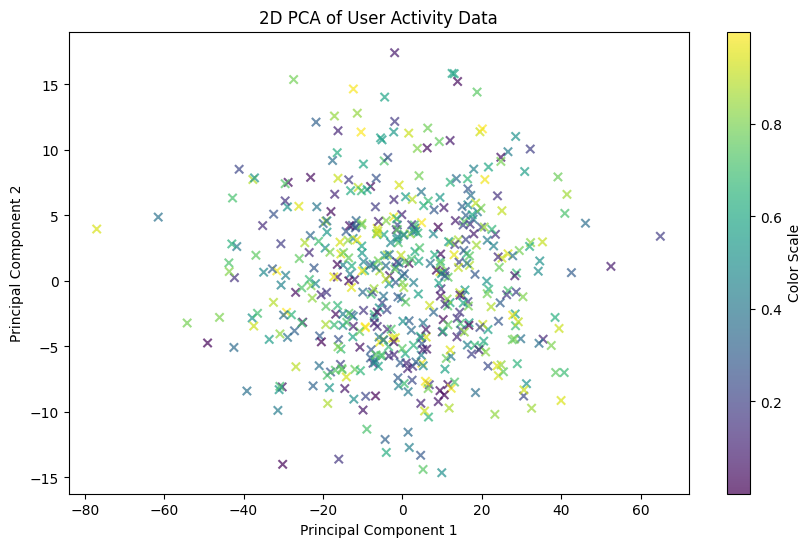

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = np.random.rand(user_activity_matrix.shape[0])
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], c=colors, marker='x', cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of User Activity Data')

# Add a color bar
plt.colorbar(label='Color Scale')

# Show the plot
plt.show()

a) The data points overlap significantly, it suggests that the principal components do not provide a clear separation, and the underlying structure of the data might not be well captured by the first two principal components.


### 2D Representation of the Data

The 2D representation captures the original structure of the data by projecting it onto the first two principal components. These principal components are the directions in which the data varies the most. By reducing the dimensionality from four to two, we can visualize the data in a 2D space while retaining as much of the original variance as possible.

However, it's important to note that while the first two principal components capture the majority of the variance, they may not capture all the underlying structure of the data. This is evident from the significant overlap of data points in the scatter plot, suggesting that the first two principal components do not provide a clear separation of the data. Therefore, while the 2D representation provides a useful visualization, it may not fully represent the complexity of the original dataset.
